<a href="https://colab.research.google.com/github/PPareun/DeepLearningTextBook/blob/main/Article_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install trafilatura

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from trafilatura import fetch_url, extract
def content(url: str):
    doc = fetch_url(url)
    return (extract(doc))

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import pickle

In [13]:
dfA = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AI.xlsx')
dfN = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NAI1.xlsx')
urlA = dfA['URL']
urlN = dfN['URL']
AI = []
NAI = []
count = 0

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
with open('/content/drive/MyDrive/Colab Notebooks/AI.pkl', 'rb') as f:
  AI = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/NAI.pkl', 'rb') as f:
  NAI = pickle.load(f)

In [ ]:
"""for index,(urla,urln) in enumerate(zip(urlA[8077:],urlN[8077:])):
  try:
    AI.append(content(urla))
    NAI.append(content(urln))
    if(index%10 == 0):
      with open('/content/drive/MyDrive/Colab Notebooks/AI.pkl', 'wb') as f:
        pickle.dump(AI,f)
      with open('/content/drive/MyDrive/Colab Notebooks/NAI.pkl', 'wb') as f:
        pickle.dump(NAI,f)
  except:
    count+=1
  print(index)

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

In [16]:
from konlpy.tag import Mecab
mecab = Mecab()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import tensorflow as tf
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

In [18]:
y_data = [1 for _ in range(len(AI))] +[0 for _ in range(len(NAI))] 

In [19]:
X_data = AI+NAI

In [20]:
print(len(y_data))

15942


In [21]:
tokenizer = Tokenizer(num_words = 150, oov_token='<UNK>')
X = []
y = []
none_count = 0
for index, text in enumerate(X_data):
  try:
    text = re.sub(r'\([^)]*\)' , "", text)
    text = re.sub(r'\[[^)]*\]' , "", text)
    text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s-]", "", text)
    text = re.sub(r'\n'," ",text)
    if(text.replace(" ", '') != ""):
      X.append(list(mecab.nouns(text)))
      y.append(y_data[index])
  except:
    none_count += 1
tokenizer.fit_on_texts(X)

In [22]:
X_data = []
for sent in X:
  s = []
  for word in sent:
    if word in tokenizer.word_index:
      s.append(tokenizer.word_index[word])
    else:
      s.append(1)
  X_data.append(s)

Max_len : 4864
Avg_len : 237.016788
data < max_len : 0.959482


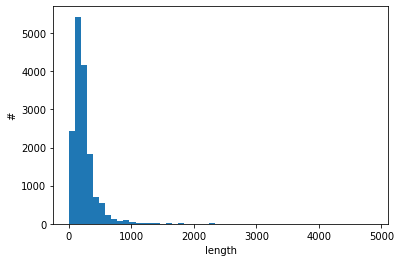

In [17]:
print('Max_len : %d' % max(len(sample) for sample in X_data))
print('Avg_len : %f' % (sum(map(len, X_data))/len(X_data)))
count = 0
for sample in X_data:
  if len(sample) < 600:
    count += 1
print('data < max_len : %f' % (count/len(X_data)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length')
plt.ylabel('#')
plt.show()

In [26]:
max_len = 600
vocab_size = len(tokenizer.word_index)+1
embedding_dim = 256
hidden_units = 512

In [27]:
X_data = pad_sequences(X_data, maxlen = max_len)
y_data = np.array(y)

In [28]:
print(len(X_data)-len(y_data))

0


In [23]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,  Bidirectional, Embedding, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stopping = EarlyStopping(min_delta=0.001,patience=10,restore_best_weights=True)
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True, input_length=max_len))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Flatten())
model.add(Dense(16,activation = ('relu')))
model.add(Dense(1, activation=('sigmoid')))
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.2, random_state=777, shuffle = True)
history = model.fit(X_train, y_train, batch_size=32, epochs=6, validation_split=0.1, callbacks = [early_stopping])
print(model.summary())

Epoch 1/6
357/357 [==============================] - 1085s 3s/step - loss: 0.4532 - accuracy: 0.7963 - val_loss: 0.4046 - val_accuracy: 0.8178
Epoch 2/6
357/357 [==============================] - 1109s 3s/step - loss: 0.2459 - accuracy: 0.8983 - val_loss: 0.2580 - val_accuracy: 0.8896
Epoch 3/6
357/357 [==============================] - 1091s 3s/step - loss: 0.1549 - accuracy: 0.9367 - val_loss: 0.2095 - val_accuracy: 0.9188
Epoch 4/6
357/357 [==============================] - 1063s 3s/step - loss: 0.0969 - accuracy: 0.9604 - val_loss: 0.2527 - val_accuracy: 0.9077
Epoch 5/6
357/357 [==============================] - 1062s 3s/step - loss: 0.0605 - accuracy: 0.9760 - val_loss: 0.3474 - val_accuracy: 0.8912
Epoch 6/6
357/357 [==============================] - 1042s 3s/step - loss: 0.0407 - accuracy: 0.9822 - val_loss: 0.3312 - val_accuracy: 0.9038
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape             

In [30]:
model.save("/content/drive/MyDrive/Colab Notebooks/AITextClassifier_Bi_LSTM.h5")

In [24]:
model_BiLSTM = models.load_model("/content/drive/MyDrive/Colab Notebooks/AITextClassifier_Bi_LSTM.h5")
model_Dense = models.load_model("/content/drive/MyDrive/Colab Notebooks/AITextClassifier_Dense.h5")

In [31]:
model_BiLSTM.evaluate(X_test, y_test)
model_Dense.evaluate(X_test, y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9012


[0.2585310935974121, 0.9012306928634644]

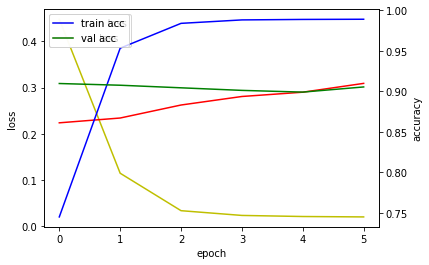

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [7]:
urls = ['list(urlN[3000:3020])']
for url in urls:
  try:
    text = content(url)
    text = re.sub(r'\([^)]*\)' , "", text)
    text = re.sub(r'\[[^)]*\]' , "", text)
    text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s-]", "", text)
    if(text.replace(" ", '') != ""):
        tokens = list(mecab.nouns(text))
    txt = []
    for word in tokens:
      if word in tokenizer.word_index:
        txt.append(tokenizer.word_index[word])
      else:
        txt.append(1)
    x = pad_sequences([txt], maxlen = max_len)
    predict_BiLSTM = model(x)
    predict_Dense = model_Dense.predict(x)
    print(url)
    print("해당 TEXT가 AI관련 뉴스일 확률은 {:2.3%}입니다.(Bi_LSTM)".format(float(predict_BiLSTM[0])))
    print("해당 TEXT가 AI관련 뉴스일 확률은 {:2.3%}입니다.(Dense)".format(float(predict_Dense[0])))
  except:
    print("해당 URL은 유효하지 않습니다.")

해당 URL은 유효하지 않습니다.


In [ ]:
pred(input())

아직은 테크 기업이라 불리기 부족한 성적표자 이야기의 본 주제로 돌아와서,그래서 야놀자는 과연 테크 기업인가, 아닌가?\n이 두 업체는 21년 클라우드 매출 비중에는 없던 사업영역으로 22년 상반기부터 야놀자 클라우드 부문에 추가된 항목들입니다.\n호텔 PMS 시장의 특성야놀자가 테크 기업으로 변신하기 위해 정조준하고 있는 건 호텔 PMS 솔루션 시장입니다.\n오라클을 경쟁업체처럼 부각해야 테크 기업으로써 야놀자의 면모가 부각되니 오라클을 팔아 마치 야놀자가 오라클의 경쟁기업이자 글로벌 테크 기업인 것처럼 포장하려는 전략입니다.\n이제 야놀자는 모텔을 넘어서 펜션과 액티비티까지 아우를 수 있는 종합여행 플랫폼이 되었습니다... 만 아직도 많은 사람이 야놀자를 여가 플랫폼이 아니라 모텔 대실 플랫폼으로 인식합니다.\n
1/1 [==============================] - 0s 274ms/step
해당 TEXT가 AI관련 뉴스일 확률은 99.869%입니다.


In [46]:
text = """아직은 테크 기업이라 불리기 부족한 성적표자 이야기의 본 주제로 돌아와서,그래서 야놀자는 과연 테크 기업인가, 아닌가?\n이 두 업체는 21년 클라우드 매출 비중에는 없던 사업영역으로 22년 상반기부터 야놀자 클라우드 부문에 추가된 항목들입니다.\n호텔 PMS 시장의 특성야놀자가 테크 기업으로 변신하기 위해 정조준하고 있는 건 호텔 PMS 솔루션 시장입니다.\n오라클을 경쟁업체처럼 부각해야 테크 기업으로써 야놀자의 면모가 부각되니 오라클을 팔아 마치 야놀자가 오라클의 경쟁기업이자 글로벌 테크 기업인 것처럼 포장하려는 전략입니다.\n이제 야놀자는 모텔을 넘어서 펜션과 액티비티까지 아우를 수 있는 종합여행 플랫폼이 되었습니다... 만 아직도 많은 사람이 야놀자를 여가 플랫폼이 아니라 모텔 대실 플랫폼으로 인식합니다.\n"""
text = re.sub(r'\([^)]*\)' , "", text)
text = re.sub(r'\[[^)]*\]' , "", text)
text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s-]", "", text)
if(text.replace(" ", '') != ""):
  tokens = list(mecab.nouns(text))
  txt = []
  for word in tokens:
    if word in tokenizer.word_index:
      txt.append(tokenizer.word_index[word])
    else:
      txt.append(1)
x = pad_sequences([txt], maxlen = max_len)
predict_BiLSTM = model_BiLSTM.predict(x)
predict_Dense = model_Dense.predict(x)
print("해당 TEXT가 AI관련 뉴스일 확률은 {:2.3%}입니다.(Bi_LSTM)".format(float(predict_BiLSTM[0])))
print("해당 TEXT가 AI관련 뉴스일 확률은 {:2.3%}입니다.(Dense)".format(float(predict_Dense[0])))

1/1 [==============================] - 0s 19ms/step
해당 TEXT가 AI관련 뉴스일 확률은 71.383%입니다.(Bi_LSTM)
해당 TEXT가 AI관련 뉴스일 확률은 86.685%입니다.(Dense)
